In [334]:
import numpy as np
import matplotlib.pyplot as plt

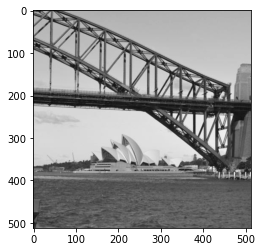

In [335]:
f = np.array(plt.imread('operahall.png'), dtype=float)
fc = f.copy()
fc_orig = f.copy()
plt.imshow(f, cmap='gray')

# 6a

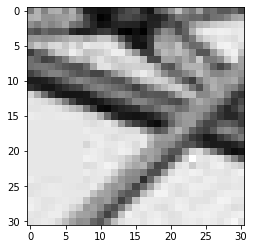

In [336]:
#load top left block
fa = f[0:31,0:31]
plt.imshow(fa, cmap='gray')

In [337]:
#2D fft2
from numpy.fft import *
F = fft2(fa)

(484.24707198143005+0j)
(484.24707198143005+0j)


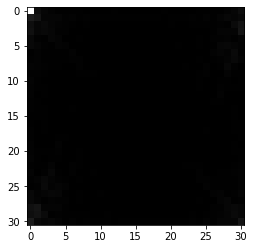

In [338]:
print(np.amax(F))
print(F[0,0])

#WHAT IS THE SIGNIFICANCE:


plt.imshow(np.abs(F), cmap='gray')

### The brightest pixel is at [0,0] (top left corner)

### The significance of this pixel is that it's the direct current value (DC coefficent) and represent the average of data values. However since we use SciPy convention it would represesnt the sum of all values.

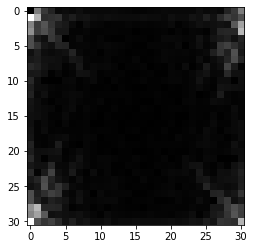

In [339]:
#Zero out the DC coefficient of F, and use imshow once more to visualize the data.

F[0,0] = 0

plt.imshow(np.abs(F),cmap='gray')

# 6b

In [340]:
import math as math

def Compress(X, tol):
    #[row][col]
    rows, cols = X.shape
    
    drop_count = 0
    total_original_nonzero = 0
    
    for width in range(0, cols, 32):
        for height in range(0, rows, 32):
            
            f = X[ height:(height+31), width:(width+31) ]
            F = fft2(f)
            max_F = np.amax(F)
            
            total_original_nonzero = total_original_nonzero + np.count_nonzero(F)
            
            existing_nonzero = np.count_nonzero(F)

            F[ abs(F) <= (max_F*tol)] = 0
            
            #add drop
            drop_count = drop_count + (existing_nonzero - np.count_nonzero(F) )
            
            X[height:(height+31), width:(width+31)] = ifft2(F).real
    
    return X,(drop_count / total_original_nonzero)




# 6c

0.4970001951092612


Text(0.5, 1.0, 'Tol: 0.001, Drop Ratio: 0.497')

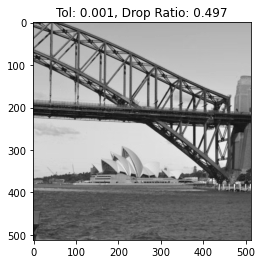

In [341]:
#DROP RATIO 0.5

tol = 0.001  #0.001015
Y, drop_ratio = Compress(fc.copy(),tol)

print(drop_ratio)

drop_ratio=round(drop_ratio,3)
plt.imshow(Y, cmap='gray')
plt.title('Tol: '+str(tol)+', Drop Ratio: '+str(drop_ratio))


0.8025169094693028


Text(0.5, 1.0, 'Tol: 0.0041, Drop Ratio: 0.803')

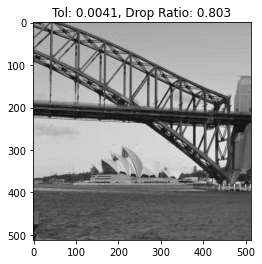

In [342]:
#DROP RATIO 0.8

tol = 0.0041 #0.00405
Y, drop_ratio = Compress(fc.copy(),tol)

print(drop_ratio)

drop_ratio=round(drop_ratio,3)
plt.imshow(Y, cmap='gray')
plt.title('Tol: '+str(tol)+', Drop Ratio: '+str(drop_ratio))

0.9197694458896982


Text(0.5, 1.0, 'Tol: 0.0096, Drop Ratio: 0.92')

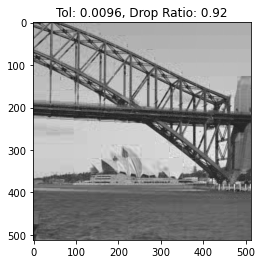

In [343]:
#DROP RATIO 0.92

tol = 0.0096  #0.00958
Y, drop_ratio = Compress(fc.copy(),tol)

print(drop_ratio)

drop_ratio=round(drop_ratio,3)
plt.imshow(Y, cmap='gray')
plt.title('Tol: '+str(tol)+', Drop Ratio: '+str(drop_ratio))

0.9706929630593132


Text(0.5, 1.0, 'Tol: 0.021, Drop Ratio: 0.971')

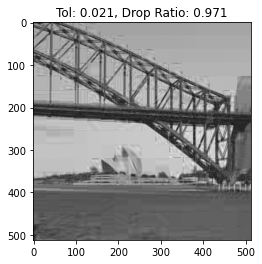

In [344]:
#DROP RATIO 0.97

tol =  0.021 #0.0205
Y, drop_ratio = Compress(fc.copy(),tol)

print(drop_ratio)

drop_ratio=round(drop_ratio,3)
plt.imshow(Y, cmap='gray')
plt.title('Tol: '+str(tol)+', Drop Ratio: '+str(drop_ratio))

## Visilizing the error of tol = 0.001 => Drop ratio ~ 0.5

Text(0.5, 1.0, 'Visualization of Error for Tol = 0.01')

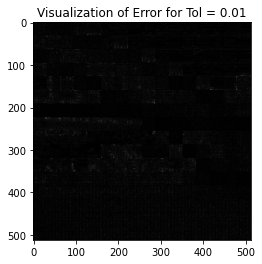

In [347]:
tol = 0.001  #0.001015
compressed_img, drop_ratio = Compress(fc.copy(),tol)

error_img = abs(compressed_img - fc_orig)

drop_ratio=round(drop_ratio,3)
plt.imshow(error_img, cmap='gray')
plt.title('Visualization of Error for Tol = 0.01')

#little to no visual error! 